In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r"C:\Users\mypc\Downloads\Forecasting_COVID-19-master\Forecasting_COVID-19-master\Dataset\case_time_series.csv")

In [5]:
df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30/01/2020,1,1,0,0,0,0
1,31/01/2020,0,1,0,0,0,0
2,01/02/2020,0,1,0,0,0,0
3,02/02/2020,1,2,0,0,0,0
4,03/02/2020,1,3,0,0,0,0
...,...,...,...,...,...,...,...
250,06/10/2020,71869,6754191,81945,5741231,990,104005
251,07/10/2020,78809,6833000,83209,5824440,963,104968
252,08/10/2020,70797,6903797,78745,5903185,967,105935
253,09/10/2020,73305,6977102,82628,5985813,929,106864


In [32]:
df.columns

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [33]:
all_data = df['Daily Confirmed'].values.astype(float)

In [34]:
print(all_data)

[1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 2.2000e+01 2.0000e+00
 1.0000e+00 3.0000e+00 5.0000e+00 9.0000e+00 1.5000e+01 8.0000e+00
 1.0000e+01 1.0000e+01 1.1000e+01 1.0000e+01 1.4000e+01 2.0000e+01
 2.5000e+01 2.7000e+01 5.8000e+01 7.8000e+01 6.9000e+01 9.4000e+01
 7.4000e+01 8.6000e+01 7.3000e+01 1.5300e+02 1.3600e+02 1.2000e+02
 1.8700e+02 3.0900e+02 4.2400e+02 4.8600e+02 5.6000e+02 5.7900e+02
 6.0900e+02 4.8400e+02 5.7300e+02 5.6500e+02 8.1300e+02 8.7100e+02
 8.5400e+02 7.5800e+02 1.2430e+03 1.0310e+03 8.8600e+02 1.0610e+03
 9.2200e+02 1.3710e+03 1.5800e+03 1.2390e+03 1.5370e+03 1.2920e+03
 1.6670e+03 1.4080e+03 1.8350e+03 1.6070e+03 1.5680e+03 1.9020

In [35]:
test_data_size = 15

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [36]:
print(len(train_data))
print(len(test_data))

240
15


In [37]:
print(test_data)

[88759. 82770. 69669. 80500. 86748. 81784. 79883. 75479. 74770. 60130.
 71869. 78809. 70797. 73305. 74418.]


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [39]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.99997956]
 [-1.        ]
 [-1.        ]
 [-0.99997956]
 [-0.99997956]]
[[0.52244022]
 [0.70369916]
 [0.77198038]
 [0.75599837]
 [0.75182914]]


In [40]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [41]:
train_window = 12

In [42]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [43]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [44]:
train_inout_seq[:5]

[(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.])),
 (tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000]),
  tensor([-1.]))]

In [45]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [46]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [47]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [48]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00073268
epoch:  26 loss: 0.01124309
epoch:  51 loss: 0.01906696
epoch:  76 loss: 0.02197686
epoch: 101 loss: 0.00110660
epoch: 126 loss: 0.00000232
epoch: 149 loss: 0.0029108031


In [49]:
fut_pred = 15

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.6740854382514954, 0.8618025779724121, 1.0, 0.9780707359313965, 0.9001226425170898, 0.8919681310653687, 0.7861230373382568, 0.5224401950836182, 0.7036991715431213, 0.7719804048538208, 0.7559983730316162, 0.7518291473388672]


In [50]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [51]:
test_inputs[fut_pred:]

[0.4933318793773651,
 1.0085740089416504,
 0.9240334033966064,
 0.9675493240356445,
 1.297325611114502,
 0.8993901014328003,
 0.7964391708374023,
 1.0248830318450928,
 1.0461137294769287,
 1.1208851337432861,
 1.3501139879226685,
 1.144467830657959]

In [52]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[ 89010.74560046]
 [ 98556.98031306]
 [ 85300.87450862]
 [ 73068.72885793]
 [ 98279.52625751]
 [ 94142.9544282 ]
 [ 96272.18842506]
 [112408.14215183]
 [ 92937.15766311]
 [ 87899.76862907]
 [ 99077.52674818]
 [100116.34478331]
 [103774.90959406]
 [114991.07742906]
 [104928.81095409]]


In [26]:
x = np.arange(240, 255, 1)
print(x)

[240 241 242 243 244 245 246 247 248 249 250 251 252 253 254]


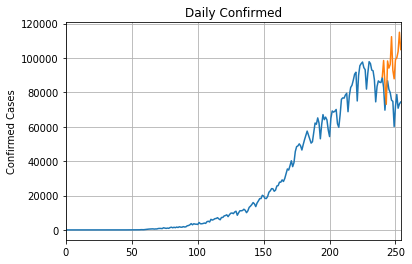

In [53]:
plt.title('Daily Confirmed')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['Daily Confirmed'])
plt.plot(x,actual_predictions)
plt.show()

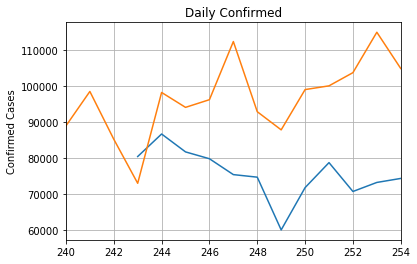

In [54]:
plt.title('Daily Confirmed')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(df['Daily Confirmed'][-train_window:])
plt.plot(x,actual_predictions)
plt.show()